# Advanced Deep Learning with TensorFlow 2 and Keras(-ing)

김보람  
2023-03-22

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.11.0

In [3]:
from tensorflow.keras import backend as K
print(K.epsilon())

1e-07

# ref

[Advanced Deep Learning with TensorFlow 2 and Keras](https://product.kyobobook.co.kr/detail/S000001982273)  
텐서플로우 2와 케라스를 이용한 고급 딥러닝 - DL, GAN, VAE 심층 RL,
비지도 학습, 객체 감지 및 분할 등 적용 - [git
hub](https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras)

# 1장 Keras를 이용한 고급 심층 학습 소개

## MLP

-   멀티레이어 퍼셉트론(Multilayer Perceptrom)

: 완전 연결 네트워크, 심층 피드-포워드망, 피드-포워드 신경망

## CNN

## RNN

# 3장 오토인코더

`-` 인코더: 입력 $x$ 를 낮은 차원의 텐서 벡터 $z=f(x)$로 변환

-   MNIST숫자에서 학습할 특징: 필기 스타일, 기울기 각도, 획의 둥근 정도,
    두께 등

`-` 디코더: 잠재 벡터, $g(z) = \tilde{x}$ 로부터 입력 복원

-   $\tilde{x}$ 가 \$ x \$와 가까워지도록 하는것이 목표

`-` 인코더와 디코더는 비선형 함수

`-` 오토인코더를 MLP또는 CNN으로 구현 가능

`-` 역전파를 통한 손실 함수를 최소화하여 훈련

-   오토 인코더의 손실 함수

$$L = -log p(x|z)$$

![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA1gAAAC5CAIAAAC6DQlFAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAZ%0ARElEQVR42u3dPXqqThvH8Zvn+i8FLLxcAawATpPK1g5KbexS2tlAKV1aK5vACmQFXhbO7IWnQI0o%0AKho0vnw/1TnxNePk9scwMxh5ngsAAADez/9oAgAAAIIgAAAACIIAAAAgCAIAAIAgCAAAAIIgAAAA%0ACIIAAAAgCAIAAIAgCAAAAIIgAAAACIIAAAAgCAIAAIAgCAAAAIIgAAAACIIAAAAgCAIAAIAgCAAA%0AAIIgAAAACIIAAAC41H80wbsxDINGuFqe5zQCvY5eR6+j14EgCP7C+V4BvY5eR6+j1+G5cWoYAACA%0AIAgAAACCIAA8rDQwDCfSNAQAEAQBAABAEASAs3TkND6geIvnBACCIAAAAAiCAAAAIAgCwGk6jQLH%0AWHOCtDhpqyPHMKxBJpINLMMon83VaeDsPCRKd070FstT0p17OEFU4zkB4NGxoTSAV5MGlhf//DeL%0APUuSfOKeeoTjxdnuQwZePA3VvG9ufzTwvNIdrIWoeZ/WBvDUGBEE8Gox0ItF7DBReZ7nea4S35Z4%0AloqY/Xmeq9AWsUOV53m+znlp4MWZ2P7mEblSoW9LNuiVR/e291CJLyLZ9FsffU4AIAgCwL1paft+%0AmHz13XUgM91h1z6ZHGexiJ/MJ5tHiGn2J1+hLdlgnP7EwPBrcw/THYY2TQ3gBXBqGMBLMd3+9iSw%0A1lp9f8+mg0z848lxtRCR2DPiihsXKy1F+rO7/3aG+sxWR2RBawN4dowIAng1Oo0CxwmiVIlY/4rB%0AvePUMqPJALwrRgQBvFYKjBxr2lXz+c/43ellvFbbFpHSwhAAeBeMCAJ4Jel4kJXP4oo+PeZntjpS%0Ang0IAARBAHhS2aC32QZQp4FT2ktmfY/p988+ge6HLyKxt91vcP04wzCMoH48LD0nABAEAeBmWc8y%0ADjiRXqe6bOAVt1ub7QHjWZRqLSLmv669ucN682d3UmwHE3vbJ7XWG8qc2nzwR8VzAgBBEADuzZ2o%0AxLe3q0NsP1TFToIDb6xERMz+1+4d1g/KVbj7Q9v2EzWvFwOPPCcAPAEjz3Na4b0+coMPnaaj6Wg6%0Amg40HUQYEURNaWAcE/zNHHsdOZyFA3DLKrd3zek/Q7kDQRAAgDvL4oFnEcBAEAREZHsp1X21p1EB%0AwDNVOZX4thxecxogCAIA8OpMt7gqTTb9JgmCIAj8tc3OboZhOEGqaBAAN8+C/a/Q/oMkSLkDQRDP%0AJA0Mw4nSNHB+StfhuZSdylYxB1vvPNpwdrf2LW6OnO2OcCJZ7HmDrOL5j71A8Q71+iK0BvOuAdSM%0Agq3O3pjgqVJTo9bdttxR63CxHG/mug898Y/OEVzfeqh0/8Q/3GPNT7ZTcUL75OOLF7DDRBUTdzZ3%0A/7lL1fOXbhaxd/aW2zzVHZoONB1N9xRNd7TKlW44U2rO1bqblztqHS7+uGkCimPdEilH0976Vttf%0AVxy1qWSqXPm2P1DrQlaUx+2tyfbm8v0Tfz9X5uVXWP/P31Y8pULfPrhD6UX4SibN0HQ0Xd0guC5W%0AZ0vN6Vp3h3JHrQNBEH8VBEuVS4X2bi0M7f2D4lyFtm3boaq+tfScO2W48vbqO5Sedz+ZUhxJMzQd%0ATXdxEDxbak7XuvwO5Y5ah0sxRxC1VZaWed9c39r9Z+5Nq9lSy0zE/3DLc7Dn8/m8b1bfKsUlY7Pl%0AZpK03bbKt1vt7ckPvVqISOzt7QVrDTIRWay2E2T8z77JxwjgInq1WFeg86XmdK2Te5U7ah0uQBDE%0AvWLkfmm74NYz1DL7/TsAgNMFpl6pOVtpbl7uqHUgCOIB/RztXn5r1R12yqHVto+fCplzZAzgeuks%0A3pzxqFdqLq9mlDsQBPHirLYtEs9KFyXWkbO+UHHVrevqW5xBcT98kXhU2gQhncXbfxfbOwzGKS0N%0AoFE6Gm1zYI1Sc7rWCeUOBEG8J/Nf1xaJPWez2ZVOg95gM1Xm4FbRaeR48c9MmmICzaC3vsPm5i33%0AwxeR2Nvdjmuzk1dAvQRwVQhMA8caZDtT7s6WmtO1Tih3eESsl2El3a9WDYvYoapYbbf/oyv2ESyt%0Aizu3VeGR2zfPcXofRFbSsfSVpqPpjlQ5u7xC90ypuXYfwcbKHbUOrBrGY3Inc7VTIG0/TNRku3LO%0A7M9V4u9tgjpxS4/ff3i5mLqTXIU7zyC27SdqPnFpegDXqaoiZ0vN6VpHucN1o9PR+mo1jhOkWm9/%0AGKS/v3CMUWR/vA/D4EOn6Wg6mo6mA033JCkwCsat4dA1TRGt03FvFGeZiO0nXxO3geVBfNj8hYOm%0Ao+loOpoONN2b4tQwAAAAQRAAUOz24USalgBAEAQAAABBEL+hm1nbA9DrQJcD6HUEwWdj9ifDVc9w%0A6K6g1/2q5DuVu+amgVE+m6vTwCk2WzAMwwmigybY7MBbvl1HjmFYg0wkG1jGyefcadY0KO6o06i4%0Ax9ueV6bQgV73hNhK8Y6KXUBtP1F/+Cb40N+s6V6r1xV78ZZ3+F3/jrvb7VZs2Ftre/ODrX63j6rc%0ABHh9a+KL2Hvbwr1zr3uILketo9eh7sdNE/xFZ/3L7kpxfL+me6lel/gHSbD8o4MvBKVC394JdetM%0A95Px1rlw8wwqtPevzbB9SLJ9zM6TbK/z0GgCfIHDjz/+XqbW0etw5yC4Lqbb+rn5vx/ykZSGNH6+%0ANfzwD7orxfEdm+6Vet1BEqzIgftDhrsjiVWDiiq0bbsUFEtB8Mw45Dp63qbSPWuv++suR62j1xE9%0A7hwEk3Dd6irxi4vP+qHaHGofFOUnPtRo3N0PXSiOz9N09Lo6SbD838pTuKVTudVJcT80lmLdkYds%0Afnz2GZ+n171Ol6PW0euEkcF6GlksoqNg9W/Sd00RMa22nQ2sUXvYN0V/j+LM9j9e4AKI7qSxQ5bt%0AF5XtJypv5AIxeE30uupm+fBF4tl6xUg6i0V+ioxaZjWewm5bl77qmYdc8Yx0OYBe9wCaCILpePnR%0ALze3/9k3RcTsz/OcC2GXGiuwBtl62HpOLwW97prvjWFob5JgOovFDofbImO17eNnaeebQpUt1aUv%0AesVD6HIUOtDrGvvtnNJGBpv/B7/fo6CBIKjl46cKi/6eZq9ycHyDD9LwYrH9RM3XA6gAve5y5r9u%0AkQR1NIrF7v77+bXMVkckG4zTow+22vbOgOK6bh3ZlubEQw7GIkGhA73uRr9dFKw+vvI8V59Ly4l0%0AGgSr4TxXiS/xqWpX0y1O9tssDzkyZv0Ii5mEeTNv1HQv2+vW8/jCiuG/9YSj3V+7vC54fwlw5arh%0A8grgo6uG/eTWVe/Zet2jdDlqHb3udcLDzprbTXlS2zL4++nJTX/YN501/cwf5HY1DX/h1f386k6z%0AXpdEcXyzXredDFSRwKrnntu760uO7CO4P9HozD6C68cQBB+wyz1u011a7u5Y4uh1jygp9RcVNr8C%0A9xaH6aW3qBKW7XCod9s695sYyQDD8/a6k5u2qND/2eFZ7MPBArUTBg93mlDJ+uG7T7/9YfGUP48h%0ACFLrblru7lbi6HUPmXOT/a2smq42RvGR/2aKYORYg06iJq5Z/FtCtZ2SLWkUSJ/VIo/EMH7/oTdI%0AR05PvuZ988+f5Omajl5H0+G5mu7qSnWnEkeve4qpkIvdkNWEXy8WSceDTGSxElkvFCl33pkMSYE4%0AUd56087nr7u02f/sTHsRF5oE8IrljhKHInHNYpFOq+EDgl8HQattix1+9U2dRr1px/clm35rEdFp%0AFIxbkz5LxnDqMEK6jRwquMOuNLB2CgAesdxR4iCiV4u9nQp0mv7+8ODXQdDsf4UysAzDGi0/vyaT%0AiQo7U8swjN6sNeGcMGSz3ZFzuDdHOotLO3/8qiP+69oH+3sAwIPUwV+WO0rcm2a/yDGMoEh7h9vz%0Apd8z+f1XaAP7CJr9eZ7neb7ev9HsT+br//IRQkeOM2p/5bnqLrxgb+u2UXM5kDIJ4JEr4a/LHSXu%0ALY8f7jH77n+0M25Z/HqDrPPZN4sd3xer3TFstcwanetAmQTwoJood5S4N3SX2XcEQdz2WKa4+pf1%0A4fth8rXbZ9NZ3PAlaMxWZy9rAsAj1MJGyh0l7v3cZfbdf7Qzblr7wn+miJjufpfVq8UNFj8VF4Rl%0AgRKAB9JguaPEvV8UnOf93f9O5v1Jsy/BiCBumQNP176mr0lttW2OlwE8oibKHSUOt0AQROMBMDAM%0AwzAMLxaR2DMMwzAOVwyrZXb+iRzDMAxns3nW5v/Bqd20sqXiIwBwJzqNisK0rkyV23mcLXf6YG8F%0AHR0pdJQ4EATx6NzJ4dUGL5/KkEbB6uMrz3P1ubScSKdBsBrOc5X4ErObFoBHSIGRY3mDRTdReZ5/%0AfSx7jmN53sX1SUc9L85EJIvXeyvoaCxDduHFfTBHELcpkN/TTOzuledCdBSs/q2XQ5lW284G1ihU%0Ac1N0NIoz2/88niubPt0MANVHq4E1yOzt5b5Md/I5M7zs0hqko/HyU+Wu+VP+esuP+cSkxOE+GBHE%0ATahldnqCoNW2j9fX8fJj72DYLy7MZPbnbFEJ4BFioBdvK9NuUKvYLfBUuRP5N5xsU6CkQW/a/qLG%0AgSCIZ6+Rs3jvQjj7zFbn2GQXLR87e2Qe7qV+Mn02vxAZAParVDSKRYrdscp1r6oEnSh3IqZp/jyr%0AM2p/zY+eE6bEgSCIZymSq8XZMxjH17+ZrmuWS1+9Hfn1asFpEwB3oJbZweDfibpXZ7mvjoKxnEiB%0AlDgQBPE8ObCYIHg6vJ08Rq5xjM3RMoC/PNbdKzen6t7ZcqejYNwanrlOBCUOBEE8UQ48X6/cD//8%0Allh6tdg7x1y5O8PmrifPRgNAc8qDc6fr3ulyl0bfrclk90yI1poSB4IgnpVaZlKnXrkf/vqqiXuH%0Axo5hBEXaO5wgmH7PqrfV19/TjCIJ4A7MVmc/y40HJ+vekXInIjqKpN93yz/qjRUlDgRBPKl0Ftfc%0A4sAdhnJQGot6ulj9HGOX6uNMhu6RHCjhkCIJ4A7cD1+ywTjVIqLTyHG8WE7XvcpyV+xBM/AMwwmi%0A9dFvGjm9afegmFHiQBDEkygmTNda3SFm/7Mz3dt91WrbYodffVOnUW/a8X1ZH0frNArGrSOTaNLx%0AtPPJ/qsA7pQEJyrxF55lGEZvJp9foS1nJsRUlbs0GEmi8lwlnXjgWYZhGJY3kO7XQTGjxOF2cryZ%0AG3/oKrRF7FDVfkDi29sLkOw8hYjYfqLyPFehb6//W/85nrHp6HWg6Z616RJfdi6lVLPcqdD/KZXr%0AQmf7VdXzTiWOXveejOIjx/swjJt+6GlgeIvtXvv1xhCjYNyaXL+Daho4q+H8DsfKN246eh1ouidt%0AujQwvNiuU/iuKXd3K3H0uvfEqWE0QKdRUCzvSGdx3fPCO2dMJsNVlOorXzpYfcw5YwLgXvVuZz3b%0A+icVu8k0Ve4ocbh57if1c5TczNGw+Ek+kcDwJMlf9PpIHCXTdDQdTVfUu53hPx05pYsO03R4Lv/R%0ABGiCHaqhlQZW7Cc569oAvCyrbYvd+SzOe+g06nmDTPyEQTs8be4n9XOUDJrubZtOp0HPizPbT+br%0AcWwdBd//Jo/zpU6vo+loOtwUcwQBvCsd9bw4E5Es9oK0+MlYhgztAHgfnBoG8K4xcLz8VPn2wl46%0ACnrLj/mEGAjgjTD8+34fOWP+NB1NJyKitTbNbepLA2fU/nq8iV70OpqOpgNBEPyF03Q03U0zYeT0%0A5Oshp/vT62g6mg43xRxBAO9NR8H4QVMgANwacwQBvHkKbA0nLikQwHtiRBDA20qj79aklAK11jQL%0AAIIgALw4HUXS77vlH/XGipYBQBAEgJeWBtZg4BmGE6wv/KrTyOlNu0OujAPgnTBHEMA7xsCRJCp3%0AJQ0sz4sHxU/tULFkBMB7YUQQwLvR0az9NXFNEdOdqNC3RcT2Q8XKYQBvh72C3u8jZ4Momo6mo+lo%0AOtB0EBFGBAEAAAiCAAAAIAgCAACAIAgAAACCIAAAAF4K+wi+I8MwaIQrsIyOXkevo9fR6/BqfyZ8%0A3gAAAO+JU8MAAAAEQQAAABAEAQAAQBAEAAAAQRAAAAAEQQAAABAEAQAAQBAEAAAAQRAAAAAEQQAA%0AABAEAQAAQBAEAAAAQRAAAAAEQQAAABAEAQAAQBAEAAAAQRAAAAAEQQAAABAEAQAAQBAEAAAAQRAA%0AAAAEQQAAABAEAQAAQBAEAAAgCAIAAIAgCAAAAIIgAAAACIIAAAAgCAIAAIAgCAAAAIIgAAAACIIA%0AAAAgCAIAAIAgCAA7tNY0Ai7rMfQZgCAIoLlv1sgxDCfSf/LSPcsK0l+98+Did54GhnP+99WR4zhV%0AT54GRl3X/2pn3lrgOEGq79xup5vlhtLAcZx1W+rvnmWNU/5sAYIggAZ1WuazvvVr3nlW6/fNsqon%0Adyd5DSq0b/g7LzJpW+b92+1Es/z2UKTCT1rPMmlb2/vbO/8GQBAEnoPWaRQ4Tvkrz3GcIEqPnur6%0A/eBT8aI7rxdEtUeSjn0/n3n1Uw+7ZODxN2/9rNg79ytZg+zOPeTMp11zeFGnUbBptUubTP881PjN%0AkOOFzP78zkEaAEEQuGsIjBzDskZT6X5+qd1vu6/PrkxHlnUiIflJnQGofOJWRILAsLypfH7tvJ5M%0APcuplymqvp9rDn3Zoaq887xfcygpDZziravtW+9e8NbPOt+qR5NIvXR+ZY481nDVn3BVR7O8qXwW%0AT6KKT7tm+E4Dw/p5aNJdeNYl57avPGwA8Bj+owmAG6ZAa5D5iZq4+ynINN3+xO0P08DyLEdU7ZxU%0A62V7XmyHpec0TXcyT8TwvOCjVrD4I2ngxZmf7L5F0+xP5q1Heevl9/Y4Pa032G22zafdi/6d61k6%0Acry49ND+XIlj1W9tsz/P+/X+GKgJwONhRBC42bfz9zQTPzlMgTvfoe4k8SWbfuumX/az4vvfHYa2%0AxLMmR2UanrSlVwsR/+Mwf7gfvshixaLR6vg8HmQHzeYOQzsbnFtdUfSWvYea/U9f4lHjC0MOekvV%0AYOL9z8wD740RQeBW1DITu3suKFltW+KlEjkIbrFnxOdf5TZDVDsbdSil1v9arWbL5ebHi8Uiy8Tu%0APtunUq9VpfNMRxzV8dlsdYrwfOJIZH3U4Nbvlb/5a5DuFT04G1jGZijx+bob8PgYEQRuxWrbki1V%0AnbhYOa5Wb47gwXeo+a9rVw/nVA4cVUkD64e3NRgsfnQ6IhesOd6bX3dk2MdsdaRyzDKdxQ0scK63%0A7PfkvLzza00uXxzTyBFHRReq0QGPPXQbIv/eZvIki0gAgiDwXIpE5p2KBDpyvFjs7r8mN+Uw+/PE%0AzwbW7upPrdPA8WLbT+oMH1rDJFEbpSUfPybDrn3BmeG9DHbsW92dqNCOPSeItkOSOo0ueOvHmtm4%0ATunDq8iRiX9kmUeTkz7/jtppuN+dstWrxfkkr7XWWqdpGgWBE7GwBCAIAk+eBPtzFfoysIyDrWKK%0ALWUMayB+qJoPDe4kV0lXRr3tt3hvJN1EzWtO/zdd19w4GhKW2S02ITT7c5V0ZdqzNm99NL3grR97%0Azvw6D5jnsoF1t0FHa6fhbjYitx1kdXq9Xq/XG81mS5Fuiy0DgbtgjiBw2yw4mf8bpt/j0ag38HaG%0AVGzb7nQT9eUeT1o1Z7MdmWNVLEueNPNr6Cj4bn38s3bebTqLxQ5v8mXd6Ftv5Ld3Tg6H7Uxi22Pf%0AIOUfPuexCX01Jqkee2itAbxLVL+XcwuOldh2hyoC3BQjgsDNw6Dp9ifz+TzPcxX6vh8mKs/n8/mk%0AfzwFXnIW8g7bmahlPBitdtNCM5P27uzKbboffUDxyMzKOmGumL5wOCnz+MzVK7P0dcHSncznk3Ub%0Amv35i5xwBx4LI4LAHallHC/C4R2+zbROlbKsEwOOv+NOcjXU5um3oEWUUqvVbDldxFl20fjYz7rl%0AzbLl1Wy2FBFpf0z+Xf2m8/MDjX+/4936d1dKyWo2Wy4WiyzrnFhb6w5DOx6MoqG707zpeJDZ4deZ%0AowTzX9ceDGbpxHV3W2AUi580l7r097TOCnoABEEADUXOsectQuX2b/cSlfMHt5t92HYxpazT6Yi0%0APz8TsawT+5icPf+6fcpOeyiy+os2TQPDi+vd9fJNfUq7pNib6XidTkek+/n5KdapFGX2v8KpNegF%0Ara+Ja4roNCg2FT+f5cz+PFkaniPJ5qFRzxtkfjJvcKBZLTOxw6NLomp89uuGucWEWoAgCOBNtbq+%0AL80N09S7xMSxB7e6vt9tf7Ra2x9ZRfipCJxXrpK4IMlVzUy72YBivSc+1/aqFY1HluGJiNh+mKi+%0Aa9Z9eRUFvfVDxfYTNXebjFvFfNIzS+PPZWcdOdaUv1mAIAg8vOvXFviJao+ufuzFkwVNt19+yOl3%0Afvy1G9nWev/N3MhjXiOukRz+izU2Zn8yv/ihF+Tqcvd53c8AIAgC+N3AmLh5/0nfOd5MAwOZAP4c%0Aq4aBl7Xdca72+tg3UPfSIAH7GT/WB8M1iIHbYEQQeEkPPlpj/vtMWpb1ko3S8MzLx9Gx7Zv2hjNL%0A3HWaKouVIkDTjDzPaQUAAIA3xKlhAAAAgiAAAAAIggAAACAIAgAAgCAIAAAAgiAAAAAIggAAACAI%0AAgAAgCAIAAAAgiAAAAAIggAAACAIAgAA4G/9Hz7h9M4ZTyWlAAAAAElFTkSuQmCC.png)

$$ L(x, \tilde{x}) = MSE = \frac{1}{m} \sum _{i=1} ^{i=m} (x _{i} - {\tilde{x _{i}}} ) ^{2}$$

-   m: 출력의 차원 (MNIST에서 m=폭x높이x채널=28x28x1=784)

## 오토인코더 구축

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 latent_vector (Dense)       (None, 16)                50192     
                                                                 
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and instal

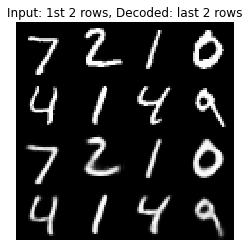

In [4]:
'''Example of autoencoder model on MNIST dataset

This autoencoder has modular design. The encoder, decoder and autoencoder
are 3 models that share weights. For example, after training the
autoencoder, the encoder can be used to  generate latent vectors
of input data for low-dim visualization like PCA or TSNE.
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

# load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# reshape to (28, 28, 1) and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
latent_dim = 16
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [32, 64]

# build the autoencoder model
# first build the encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
# stack of Conv2D(32)-Conv2D(64)
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)

# shape info needed to build decoder model
# so we don't do hand computation
# the input to the decoder's first
# Conv2DTranspose will have this shape
# shape is (7, 7, 64) which is processed by
# the decoder back to (28, 28, 1)
shape = K.int_shape(x)

# generate latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# instantiate encoder model
encoder = Model(inputs,
                latent,
                name='encoder')
encoder.summary()
plot_model(encoder,
           to_file='encoder.png',
           show_shapes=True)

# build the decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
# use the shape (7, 7, 64) that was earlier saved
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
# from vector to suitable shape for transposed conv
x = Reshape((shape[1], shape[2], shape[3]))(x)

# stack of Conv2DTranspose(64)-Conv2DTranspose(32)
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)

# reconstruct the input
outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='decoder.png', show_shapes=True)

# autoencoder = encoder + decoder
# instantiate autoencoder model
autoencoder = Model(inputs,
                    decoder(encoder(inputs)),
                    name='autoencoder')
autoencoder.summary()
plot_model(autoencoder,
           to_file='autoencoder.png',
           show_shapes=True)

# Mean Square Error (MSE) loss function, Adam optimizer
autoencoder.compile(loss='mse', optimizer='adam')

# train the autoencoder
autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=1,
                batch_size=batch_size)

# predict the autoencoder output from test data
x_decoded = autoencoder.predict(x_test)

# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('input_and_decoded.png')
plt.show()

-   인코더 모델은 낮은 차원의 잠재 벡터를 생성하기 위해서
    Conv2D(32)-Conv2D(64)-Dense(16)으로 구성
-   디코더 모델은
    Dense(16)-Conv2DTranspose(64)-Conv2DTranspose(32)-Conv2DTranspose(1)으로
    구성
-   입력은 원본 입력을 복원하기 위한 디코딩된 잠재 벡터

## 잠재벡터 시각화

![](https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/raw/master/chapter3-autoencoders/images/digit_latent_codes.png)

`-` 잠재 코드 차원

-   숫자 0: 왼쪽 아래 사분면
-   숫자 1: 오른쪽 위 사분면

## 노이즈 제거 오토인코더(DAE)

노이즈 제거 Denoising

$$ x = x_{orig} + noise $$

인코더의 목적: 잠재벡터인 $z$를 생성하는 방법을 찾는 것 $\to$ 잠재
벡터를 디코더가 MSE와 같은 손실 함수의 비 유사성을 최소화하여
$x_{orig}$로 복원

$$ L(x_{orig}, \tilde{x}) = MSE = \frac{1}{m} \sum _{i=1} ^{i=m} (x _{origi} - {\tilde{x _{i}}} ) ^{2}$$

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 latent_vector (Dense)       (None, 16)                50192     
                                                                 
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
______________________________________

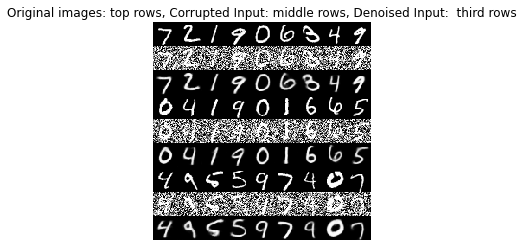

In [7]:
'''Trains a denoising autoencoder on MNIST dataset.

Denoising is one of the classic applications of autoencoders.
The denoising process removes unwanted noise that corrupted the
true data.

Noise + Data ---> Denoising Autoencoder ---> Data

Given a training dataset of corrupted data as input and
true data as output, a denoising autoencoder can recover the
hidden structure to generate clean data.

This example has modular design. The encoder, decoder and autoencoder
are 3 models that share weights. For example, after training the
autoencoder, the encoder can be used to  generate latent vectors
of input data for low-dim visualization like PCA or TSNE.
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

np.random.seed(1337)

# load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# reshape to (28, 28, 1) and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

# adding noise may exceed normalized pixel values>1.0 or <0.0
# clip pixel values >1.0 to 1.0 and <0.0 to 0.0
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
latent_dim = 16
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [32, 64]

# build the autoencoder model
# first build the encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs

# stack of Conv2D(32)-Conv2D(64)
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)

# shape info needed to build decoder model so we don't do hand computation
# the input to the decoder's first Conv2DTranspose will have this shape
# shape is (7, 7, 64) which can be processed by the decoder back to (28, 28, 1)
shape = K.int_shape(x)

# generate the latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# instantiate encoder model
encoder = Model(inputs, latent, name='encoder')
encoder.summary()

# build the decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
# use the shape (7, 7, 64) that was earlier saved
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
# from vector to suitable shape for transposed conv
x = Reshape((shape[1], shape[2], shape[3]))(x)

# stack of Conv2DTranspose(64)-Conv2DTranspose(32)
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

# reconstruct the denoised input
outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          padding='same',
                          activation='sigmoid',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# autoencoder = encoder + decoder
# instantiate autoencoder model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

# Mean Square Error (MSE) loss function, Adam optimizer
autoencoder.compile(loss='mse', optimizer='adam')

# train the autoencoder
autoencoder.fit(x_train_noisy,
                x_train,
                validation_data=(x_test_noisy, x_test),
                epochs=10,
                batch_size=batch_size)

# predict the autoencoder output from corrupted test images
x_decoded = autoencoder.predict(x_test_noisy)

# 3 sets of images with 9 MNIST digits
# 1st rows - original images
# 2nd rows - images corrupted by noise
# 3rd rows - denoised images
rows, cols = 3, 9
num = rows * cols
imgs = np.concatenate([x_test[:num], x_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure()
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('corrupted_and_denoised.png')
plt.show()

## 자동 채색 오토인코더

-   해당 코딩은 너무 길어서 생략. 자세한 것은 여기 링크 참고 $\to$ [자동
    채색
    오토인코더](https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter3-autoencoders/colorization-autoencoder-cifar10-3.4.1.py)

-   입력: 회색도 사진, 출력: 해당하는 채색된 사진들로 오토인코더를 훈련

![](https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/raw/master/chapter3-autoencoders/images/gray_color_mayon.png)

## 요약

-   노이즈 제거, 채색 등 구조적인 변환을 효율적으로 하기 위하여 데이터를
    낮은 차원의 표현으로 압축하는 신경망

# 4장 생성적 적대 신경망(GAN)

`-` 생성자(generator): 판별자를 속일 수 있는 가짜 데이터 신호를 생성하는
방법에 대해 지속적으로 알아내는 것

`-` 판별자(discriminator): 가짜와 실제 신호를 구분하도록 훈련

-   유요한 데이터는 1.0으로 레이블링 되고 합성된 데이터는 0.0(진짜일
    확률 0%)로 레이블ㄹ이 된다.

## 생성기 개발을 위한 클래스

``` python
class Generator:
    
    def __init__(self):
        self.initVariable = 1
        
    def lossFunction(self):
        
        return
    
    def buldModel(self):
        
        return
    
    def trainModel(self, inputX, inputY):
        
        return


```

## 판별기 개발을 위한 클래스

``` python

class Discriminator:
    
    def __init__(self):
        self.initVariable = 1
        
    def lossFunction(self):
        
        return
    
    def buildModel(self):
        
        return
    
    def trainModel(self,inputX,inputY):
        
        return
```

## 손실 함수

``` python

class Loss:
    
    def __init__(self):
        self.initVariable = 1
        
    def lossBaseFunction1(self):
        
        return
    
    def lossBaseFunction2(self):
        
        return
    
    
    def lossBaseFunction3(self):
        
        return
```

`-` 적대적 훈련을 할 때 생성기에서 사용하는 손실함수

$$\nabla \theta_g \sum_{i=1}^{m} log(1-D(G(z^{(i)}))) $$

`-` GAN에서 적용되는 표준 교차 엔트로피 구현

$$ \nabla \theta_d \dfrac{1}{m} \sum_{i=1}^{m} [logD(x^{(i)})+log(1-D(G(z^{(i)})))] $$

-   굿펠로우 논문에 나오는 함수

> note: 교수님이 설명해주신 코드 보는게 더 나을듯 하다. [교수님
> 코드](https://guebin.github.io/STML2022/posts/VI.%20GAN/2022-12-21-Extra-2.html)

## DCGAN

-   심층 CNN을 이용하여 초기 GAN를 성공적으로 구현

## 조건부(Conditional) GAN

-   원-핫 벡터를 제외하면 DCGAN과 유사
-   생성자와 판별자의 출력에 조건을 부여하기 위해 원-핫 벡터 사용

# 5장 향상된 GAN

## Wasserstein GAN

-   GAN의 불안정성은 Jensen-Shannon (JS) 거리에 기초한 손실함수
    때문이라고 주장

-   GAN의 최적화에 더 알맞게 JS거리 함수를 대체하기에 적합한 것을
    찾아야함

ref: https://lilianweng.github.io/posts/2017-08-20-gan/

-   책 개념이 너무 어렵당.. 관련 수식에 대해 이해하고 싶은뎀 수식에 대한
    내용이 자세하진 않음.. 일단 수식에 대한 내용이해 먼저 하고 추후에
    다시 책 읽어보는 걸로\~~